In [ ]:
#Show ALL outputs in cell, not only last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
relative_filepath = "../../"

In [ ]:
#Set relative path mapping for module imports
import sys

sys.path.append(relative_filepath)

#for path in sys.path:
#    print(path)

In [ ]:
# External Dependencies
import numpy as np
import pandas as pd

In [ ]:
# Read in pickled combined data
X_y_data = pd.read_pickle(relative_filepath + "data/interim/step_4/X_y_data.pkl")

# Read in pickled train data
X_y_train = pd.read_pickle(relative_filepath + "data/interim/step_4/X_y_train.pkl")

# Read in pickled test data
X_y_test = pd.read_pickle(relative_filepath + "data/interim/step_4/X_y_test.pkl")

# Recap data structure
X_y_data.head()
X_y_data.shape

In [ ]:
#values for config dict
input_dfs = [X_y_data,
             X_y_train,
             X_y_test]

target = "classLabel"

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

Image(url= "https://machinelearningmastery.com/wp-content/uploads/2019/11/Overview-of-Feature-Selection-Techniques3.png")

In [2]:
Image(url= "https://machinelearningmastery.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png")

# Selecting for Feature Information
## Remove Low Variance Features

In [3]:
from sklearn.datasets import make_classification, load_breast_cancer

X, y = load_breast_cancer(return_X_y = True, as_frame=True)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


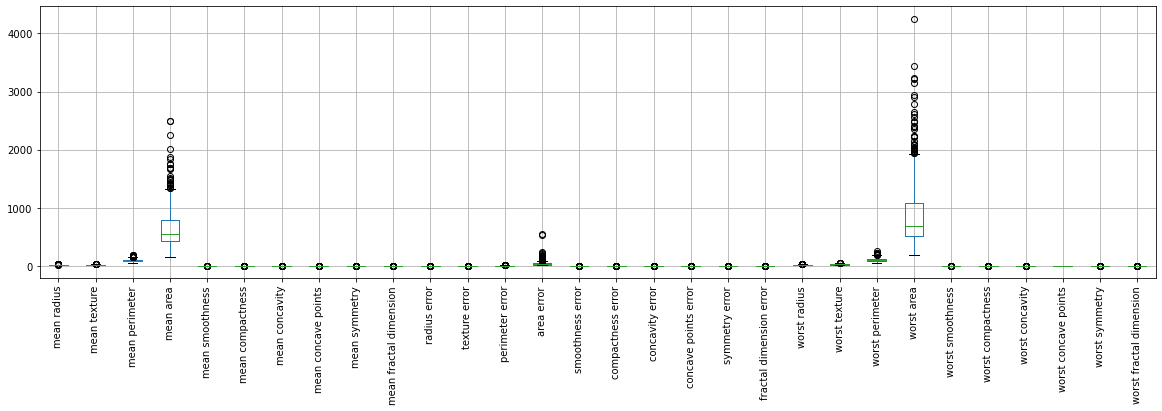

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 5))
X.boxplot(rot=90);

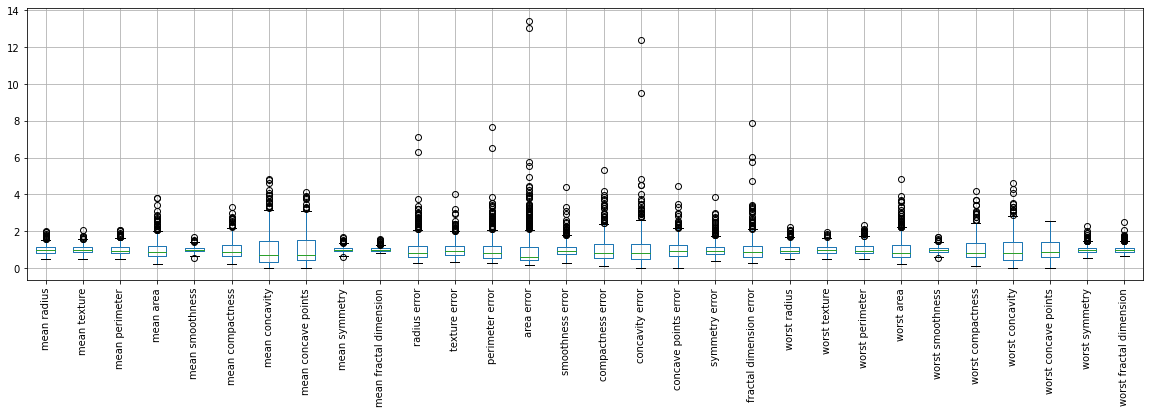

In [5]:
X_normal = X / X.mean()

plt.figure(figsize=(20, 5))
X_normal.boxplot(rot=90);

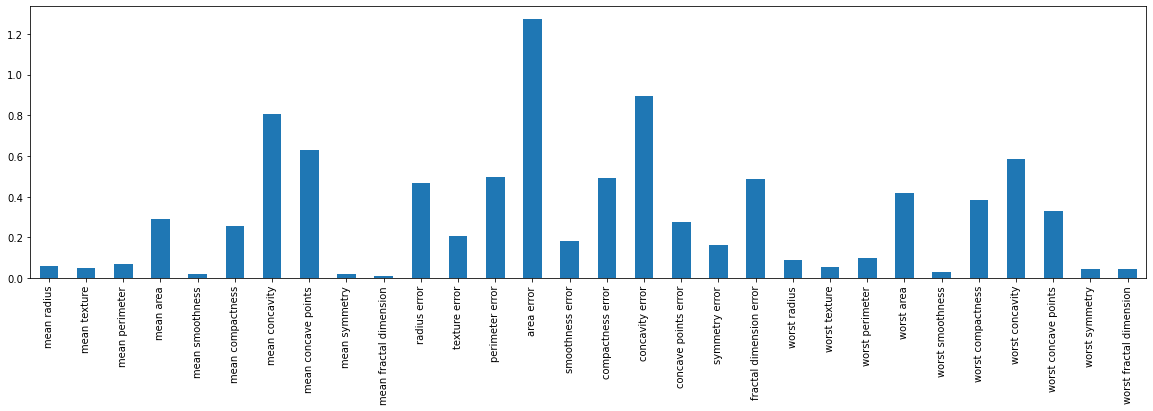

In [6]:
plt.figure(figsize=(20, 5))
X_normal.var().plot.bar();

In [7]:
from sklearn.feature_selection import VarianceThreshold

print('Before removing low variance:', X.shape)

sel = VarianceThreshold(threshold=0.005)
sel.fit(X_normal)

mask = sel.get_support()
reduced_X_var = X.loc[:, mask]

print('After removing low variance:', reduced_X_var.shape)

Before removing low variance: (569, 30)
After removing low variance: (569, 30)


## Remove High Missingness Features

In [8]:
print('Before removing high missingness:', reduced_X_var.shape, '\n')

mask = reduced_X_var.isna().sum() / len(X) < 0.3
print(mask, '\n')

reduced_X_missing = reduced_X_var.loc[:, mask]

print('After removing high missingness:', reduced_X_missing.shape, '\n')
# reduced_X_missing.head()

Before removing high missingness: (569, 30) 

mean radius                True
mean texture               True
mean perimeter             True
mean area                  True
mean smoothness            True
mean compactness           True
mean concavity             True
mean concave points        True
mean symmetry              True
mean fractal dimension     True
radius error               True
texture error              True
perimeter error            True
area error                 True
smoothness error           True
compactness error          True
concavity error            True
concave points error       True
symmetry error             True
fractal dimension error    True
worst radius               True
worst texture              True
worst perimeter            True
worst area                 True
worst smoothness           True
worst compactness          True
worst concavity            True
worst concave points       True
worst symmetry             True
worst fractal dimension   

## Remove Highly Correlated Features

In [9]:
import seaborn as sns

# sns.pairplot(reduced_X_missing, hue="target")

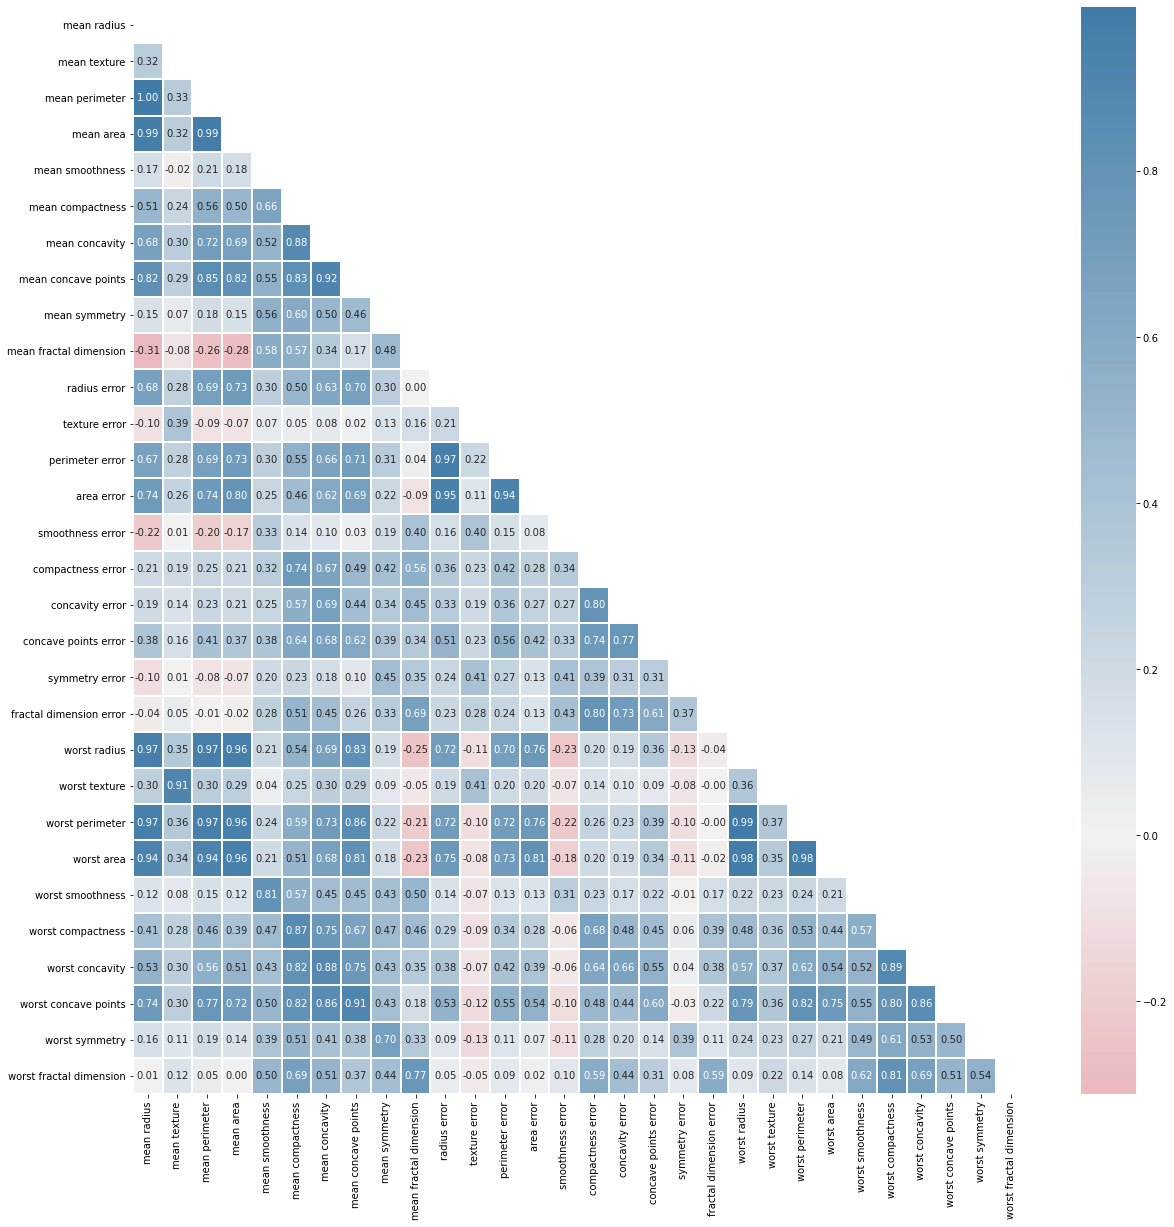

In [10]:
corr = reduced_X_missing.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)

plt.figure(figsize=(20, 20))
sns.heatmap(corr, mask=mask, 
            center=0, cmap=cmap, linewidths=1,
            annot=True, fmt=".2f");

In [11]:
print('Before removing highly correlated features:', reduced_X_missing.shape, '\n')

# Create positive correlation matrix
corr_df = reduced_X_missing.corr().abs()
corr_df.head()
#Create and apply mask
mask = np.triu(np.ones_like(corr_df, dtype=bool))

tri_df = corr_df.mask(mask)
tri_df

to_drop = [c for c in tri_df.columns if any(tri_df[c] > 1.00)]
print('Features to be dropped:', to_drop, '\n')

reduced_X_corr = reduced_X_missing.drop(to_drop, axis = 1)
print('After removing highly correlated features:', reduced_X_corr.shape, '\n')

Before removing highly correlated features: (569, 30) 

Features to be dropped: [] 

After removing highly correlated features: (569, 30) 



# Selecting for Model Accuracy

## Low Model Coefficient Features

In [15]:
X_coef = reduced_X_corr.copy()
print('Before removing low model coef features:', X_coef.shape, '\n')

Before removing low model coef features: (569, 30) 



In [16]:
# Validation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_coef,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

lr = LogisticRegression()
lr.fit(X_train_std, y_train)

X_test_std = scaler.transform(X_test)

y_pred = lr.predict(X_test_std)
accuracy_score(y_test, y_pred)

0.956140350877193

In [17]:
dict_coef = dict(zip(X.columns, abs(lr.coef_[0]).round(decimals=3)))
{k: v for k, v in sorted(dict_coef.items(), key=lambda item: item[1])}

{'mean compactness': 0.015,
 'concave points error': 0.04,
 'worst compactness': 0.175,
 'concavity error': 0.212,
 'mean smoothness': 0.237,
 'mean symmetry': 0.283,
 'perimeter error': 0.286,
 'worst fractal dimension': 0.299,
 'smoothness error': 0.366,
 'texture error': 0.446,
 'mean fractal dimension': 0.484,
 'mean texture': 0.486,
 'mean area': 0.499,
 'mean perimeter': 0.501,
 'mean radius': 0.524,
 'compactness error': 0.542,
 'worst symmetry': 0.567,
 'symmetry error': 0.577,
 'worst smoothness': 0.577,
 'fractal dimension error': 0.703,
 'worst concavity': 0.721,
 'area error': 0.731,
 'mean concavity': 0.785,
 'radius error': 0.786,
 'mean concave points': 0.846,
 'worst perimeter': 0.981,
 'worst area': 1.093,
 'worst concave points': 1.102,
 'worst radius': 1.211,
 'worst texture': 1.538}

In [18]:
print('Before removing low model coef features:', X_coef.shape, '\n')

drop_low_coef_features = ['mean compactness', 'concave points error', 'worst texture']
reduced_X_coef = X_coef.drop(drop_low_coef_features, axis=1)

print('After removing low model coef features:', reduced_X_coef.shape, '\n')
                          
X_train, X_test, y_train, y_test = train_test_split(reduced_X_coef,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

lr = LogisticRegression()
lr.fit(X_train_std, y_train)

X_test_std = scaler.transform(X_test)

y_pred = lr.predict(X_test_std)
accuracy_score(y_test, y_pred)

Before removing low model coef features: (569, 30) 

After removing low model coef features: (569, 27) 



0.9473684210526315

## Recursive Feature Elimination

In [19]:
X_rfe = reduced_X_corr.copy()
print('Before applying RFE:', X_rfe.shape, '\n')

Before applying RFE: (569, 30) 



In [23]:
from sklearn.feature_selection import RFE

X_train, X_test, y_train, y_test = train_test_split(X_rfe,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

rfe_lr = RFE(estimator=LogisticRegression(), n_features_to_select=5, verbose=0)
rfe_lr.fit(X_train_std, y_train)

rfe_lr_features_kept = list(X.columns[rfe_lr.support_])
rfe_lr_features_kept

['mean concave points',
 'worst radius',
 'worst texture',
 'worst area',
 'worst concave points']

In [24]:
dict_rfe_lr_rank = dict(zip(X_rfe.columns, rfe_lr.ranking_))
{k: v for k, v in sorted(dict_rfe_lr_rank.items(), key=lambda item: item[1])}

{'mean concave points': 1,
 'worst radius': 1,
 'worst texture': 1,
 'worst area': 1,
 'worst concave points': 1,
 'worst perimeter': 2,
 'worst smoothness': 3,
 'area error': 4,
 'mean radius': 5,
 'worst concavity': 6,
 'radius error': 7,
 'fractal dimension error': 8,
 'mean concavity': 9,
 'mean area': 10,
 'mean texture': 11,
 'symmetry error': 12,
 'worst symmetry': 13,
 'mean perimeter': 14,
 'compactness error': 15,
 'texture error': 16,
 'smoothness error': 17,
 'mean fractal dimension': 18,
 'worst fractal dimension': 19,
 'mean symmetry': 20,
 'perimeter error': 21,
 'mean smoothness': 22,
 'concavity error': 23,
 'worst compactness': 24,
 'concave points error': 25,
 'mean compactness': 26}

In [25]:
X_test_std = scaler.transform(X_test)

y_pred = rfe_lr.predict(X_test_std)
print(accuracy_score(y_test, y_pred))

0.9298245614035088


## Feature Importance with Tree-based feature selection

In [32]:
X_random_forest = reduced_X_corr.copy()
print('Before applying Random Forest feature selection:', X_random_forest.shape, '\n')

Before applying Random Forest feature selection: (569, 30) 



In [272]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_random_forest,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
print("Random Forest Test Accuracy Score:", accuracy_score(y_test, y_pred))

Random Forest Accuracy Score: 0.9649122807017544


Sum of Random Forest Feature Importance: 1.0 



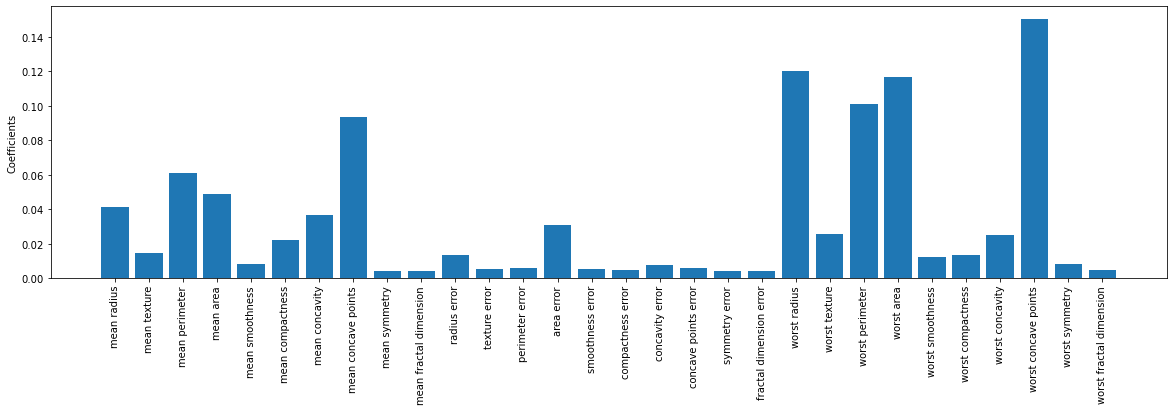

In [273]:
# Plot Random Forest feature importance
names = X_random_forest.columns

print("Sum of Random Forest Feature Importance:", sum(random_forest.feature_importances_), '\n')
# print(random_forest.feature_importances_, '\n')
random_forest_coef = random_forest.feature_importances_

plt.figure(figsize=(20, 5))
_ = plt.bar(range(len(names)), random_forest_coef)
_ = plt.xticks(range(len(names)), names, rotation=90)
_ = plt.ylabel('Coefficients');

In [274]:
mask = random_forest.feature_importances_ > 0.1
print(mask, '\n')

reduced_X_random_forest = X_random_forest.loc[:, mask]
print(reduced_X_random_forest.columns)

[False False False False False False False False False False False False
 False False False False False False False False  True False  True  True
 False False False  True False False] 

Index(['worst radius', 'worst perimeter', 'worst area',
       'worst concave points'],
      dtype='object')


In [36]:
X_rfe_random_forest = reduced_X_corr.copy()
print('Before applying RFE with Random Forest feature selection:', X_rfe_random_forest.shape, '\n')

Before applying RFE with Random Forest feature selection: (569, 30) 



In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe_random_forest,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)

rfe_random_forest = RFE(estimator=RandomForestClassifier(), n_features_to_select=5, step=2, verbose=0)
rfe_random_forest.fit(X_train, y_train)

rfe_random_forest_features_kept = list(X_rfe_random_forest.columns[rfe_random_forest.support_])
rfe_random_forest_features_kept

['mean concave points',
 'worst radius',
 'worst perimeter',
 'worst area',
 'worst concave points']

In [51]:
dict_rfe_random_forest_rank = dict(zip(X_rfe_random_forest.columns, rfe_random_forest.ranking_))
{k: v for k, v in sorted(dict_rfe_random_forest_rank.items(), key=lambda item: item[1])}

{'mean concave points': 1,
 'worst radius': 1,
 'worst perimeter': 1,
 'worst area': 1,
 'worst concave points': 1,
 'mean concavity': 2,
 'mean area': 3,
 'worst texture': 3,
 'mean perimeter': 4,
 'area error': 4,
 'mean radius': 5,
 'worst concavity': 5,
 'mean texture': 6,
 'worst compactness': 6,
 'worst smoothness': 7,
 'worst fractal dimension': 7,
 'radius error': 8,
 'perimeter error': 8,
 'mean smoothness': 9,
 'mean compactness': 9,
 'concavity error': 10,
 'fractal dimension error': 10,
 'texture error': 11,
 'worst symmetry': 11,
 'smoothness error': 12,
 'concave points error': 12,
 'mean fractal dimension': 13,
 'symmetry error': 13,
 'mean symmetry': 14,
 'compactness error': 14}

In [52]:
y_pred = rfe_random_forest.predict(X_test)
print(accuracy_score(y_test, y_pred), '\n')

rfe_random_forest_features_kept = list(X_rfe_random_forest.columns[rfe_random_forest.support_])
rfe_random_forest_features_kept

0.9385964912280702 



['mean concave points',
 'worst radius',
 'worst perimeter',
 'worst area',
 'worst concave points']

## Feature Selection with Lasso Regularization (for Linear Regression)

In [232]:
X_lr = reduced_X_corr.copy()
print('Before applying RFE with Random Forest feature selection:', X_lr.shape, '\n')


Before applying RFE with Random Forest feature selection: (569, 30) 



In [289]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_lr,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)


lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.coef_, '\n')
# print(lr.intercept_)

# Calculate R squared on Linear Regression
print("Linear Regression Test Accuracy Score:", lr.score(X_test, y_test))

[ 3.61066007e-01  3.84906932e-03 -3.20523569e-02 -7.80217712e-04
 -1.21821555e+00  4.68628702e+00 -2.29314122e+00 -1.04649853e+00
 -1.06599815e+00  5.32608528e-03  2.08355368e-02  2.66280992e-02
  2.31006636e-02 -1.06159300e-03 -1.81729684e+01 -3.52337845e+00
  4.25629987e+00 -6.57648826e+00 -4.69709366e+00  1.54762899e+01
 -2.80250688e-01 -1.48310205e-02  2.84274270e-03  1.42207231e-03
  1.45312394e-01  4.76767038e-02 -1.15947341e-01 -1.30501000e+00
  4.37596967e-01 -5.09445494e+00] 

Linear Regression Accuracy Score: 0.6769024143604252


In [291]:
X_lasso = reduced_X_corr.copy()
print('Before applying Lasso Regression:', X_lasso.shape, '\n')

Before applying Lasso Regression: (569, 30) 



Lasso Regression Accuracy Score: 0.6194832612938171 



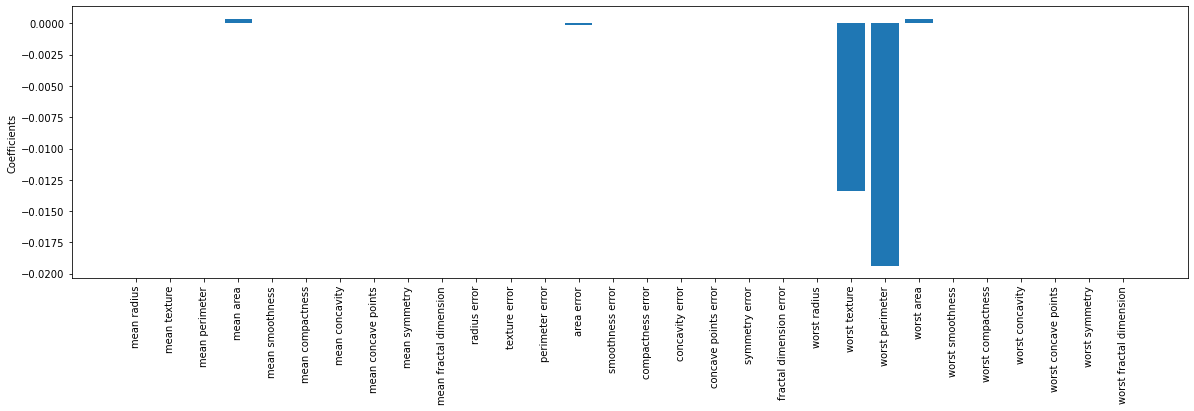

In [292]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X_lasso,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)


names = X_lasso.columns
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# print(lasso.coef_)
# print(lasso.intercept_)

# Calculate R squared on Regularised Lasso Regression
print("Lasso Regression Test Accuracy Score:", lasso.score(X_test, y_test), '\n')

lasso_coef = lasso.coef_

plt.figure(figsize=(20, 5))
_ = plt.bar(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=90)
_ = plt.ylabel('Coefficients');

In [293]:
# Automate selection of alpha for regularisation
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV()
lasso_cv.fit(X_train, y_train)

print(lasso_cv.alpha_)

0.1998881125467938


In [298]:
mask = lasso_cv.coef_ != 0
print(mask)

reduced_X_lasso_cv = X_lasso.loc[:, mask]
reduced_X_lasso_cv.shape

[False False False  True False False False False False False False False
 False False False False False False False False False  True  True  True
 False False False False False False]


(569, 4)

## Feature Selection Voting (by Combining Model Feature Selectors)

In [53]:
X_combining_fs = reduced_X_corr.copy()
print('Before applying feature selection combining & voting:', X_combining_fs.shape, '\n')


Before applying feature selection combining & voting: (569, 30) 



In [ ]:
# Create mask for Lasso CV feature selection
from sklearn.linear_model import LassoCV

X_train, X_test, y_train, y_test = train_test_split(X_combining_fs,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)

lcv = LassoCV()
lcv.fit(X_train, y_train)

print(lcv.score(X_test, y_test))

lcv_mask = lcv.coef_ != 0
sum(lcv_mask)

In [ ]:
# Create mask for RFE with Random Forest Regressor feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

rfe_random_forest = RFE(estimator=RandomForestRegressor(), n_features_to_select=5, step=2, verbose=0)
rfe_random_forest.fit(X_train, y_train)

rfe_random_forest_mask = rfe_random_forest.rf.support_

In [ ]:
# Create mask for RFE with Gradient Boosting Regressor feature selection
from sklearn.ensemble import GradientBoostingRegressor

rfe_gb = RFE(estimator=GradientBoostingRegressor(), n_features_to_select=5, step=2, verbose=0)
rfe_gb.fit(X_train, y_train)

rf_gb_mask = rfe_gb.rf.support_

In [ ]:
# Combining the feature selectors & vote for features to keep
import numpy as np

votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)
print(votes)

mask = votes >= 2
reduced_X_combining_fs = X_combining_fs.loc[:, mask]

# Principle Components Analysis (PCA)

In [181]:
X_pca_exploration = reduced_X_corr.copy()
print('Before PCA exploration:', X_pca_exploration.shape, '\n')

Before PCA exploration: (569, 30) 



In [182]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_pca_std = scaler.fit_transform(X_pca_exploration)

from sklearn.decomposition import PCA

pca_exploration = PCA()
# print(pca_exploration.fit_transform(X_pca_std))

In [183]:
pca_exploration.fit(X_pca_std)
print(pca_exploration.explained_variance_ratio_.round(decimals=2))

[0.44 0.19 0.09 0.07 0.05 0.04 0.02 0.02 0.01 0.01 0.01 0.01 0.01 0.01
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]


In [184]:
print(pca_exploration.explained_variance_ratio_.round(decimals=2).cumsum())

[0.44 0.63 0.72 0.79 0.84 0.88 0.9  0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98
 0.98 0.98]


In [185]:
# print(pca_exploration.components_)

In [186]:
# Fit Scaler & PCA in Pipeline in one go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA())
])

pipe_pca_exploration = pipe.fit_transform(X_pca_exploration)

print(pipe_pca_exploration[:,:2])

[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 ...
 [ 1.25617928 -1.90229671]
 [10.37479406  1.67201011]
 [-5.4752433  -0.67063679]]


In [187]:
X_pca_exploration['PC 1'] = pipe_pca_exploration[:,0]
X_pca_exploration['PC 2'] = pipe_pca_exploration[:,1]
X_pca_exploration['PC 3'] = pipe_pca_exploration[:,2]
X_pca_exploration['PC 4'] = pipe_pca_exploration[:,3]
X_pca_exploration['PC 5'] = pipe_pca_exploration[:,4]

X_pca_exploration.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,PC 1,PC 2,PC 3,PC 4,PC 5
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.6656,0.7119,0.2654,0.4601,0.11890,9.192837,1.948583,-1.123166,3.633731,-1.195110
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.1866,0.2416,0.1860,0.2750,0.08902,2.387802,-3.768172,-0.529293,1.118264,0.621775
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.4245,0.4504,0.2430,0.3613,0.08758,5.733896,-1.075174,-0.551748,0.912083,-0.177086
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.8663,0.6869,0.2575,0.6638,0.17300,7.122953,10.275589,-3.232790,0.152547,-2.960878
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.2050,0.4000,0.1625,0.2364,0.07678,3.935302,-1.948072,1.389767,2.940639,0.546747


In [188]:
# Decide on number of principle components to use and pipeline with model
X_pca_dr = reduced_X_corr.copy()
print('Before applying PCA for dimensionality reduction:', X_pca_for_model.shape, '\n')

Before applying PCA for dimensionality reduction: (569, 30) 



In [194]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_dr,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)

pipe_pca_dr = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=6)),
    ('classifer', RandomForestClassifier())
])

pipe_pca_dr.fit(X_train, y_train)
print(pipe_pca_dr.steps[1])

('reducer', PCA(n_components=6))


In [195]:
print(pipe_pca_dr.steps[1][1].explained_variance_ratio_.cumsum(), '\n')
print(pipe_pca_dr.score(X_test, y_test))

[0.44807772 0.63737149 0.73138349 0.79725457 0.85115553 0.88823352] 

0.9473684210526315


In [200]:
X_pca_optimal = reduced_X_corr.copy()
print('Before PCA exploration:', X_pca_optimal.shape, '\n')

Before PCA exploration: (569, 30) 



Number of components for 90% explained variance: 7 



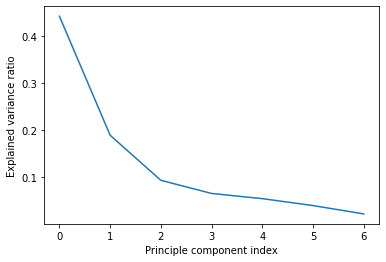

In [209]:
# An optimal number of components
pipe_pca_optimal = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=0.9))
])

pipe_pca_optimal.fit(X_pca_optimal)
print("Number of components for 90% explained variance:",len(pipe_pca_optimal.steps[1][1].components_), '\n')

# Pick the elbow for approx optimal number of components
var = pipe_pca_optimal.steps[1][1].explained_variance_ratio_

plt.plot(var)
plt.xlabel('Principle component index')
plt.ylabel('Explained variance ratio');

## t-SNE check

In [221]:
X_tsne = reduced_X_corr.copy()
print('Before X_tnse:', X_tsne.shape, '\n')

Before X_tnse: (569, 30) 



In [230]:
from sklearn.manifold import TSNE

non_numeric = []
X_tsne_numeric = X_tsne.drop(non_numeric, axis=1)
print('After removing non numeric for TSNE:', X_tsne_numeric.shape, '\n')

m = TSNE(learning_rate=50)

tsne_features = m.fit_transform(X_tsne_numeric)
tsne_features[1:4,:]

X_tsne['x'] = tsne_features[:,0]
X_tsne['y'] = tsne_features[:,1]

X_tsne.head()

After removing non numeric for TSNE: (569, 32) 



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,x,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,36.387852,8.969425
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,35.033417,6.492627
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,30.093365,7.164342
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,-14.260463,-9.754313
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,29.166979,9.339986


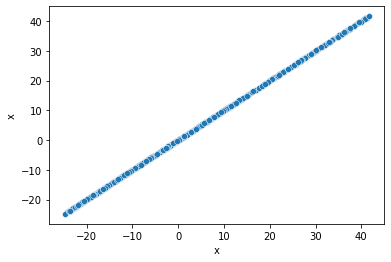

In [231]:
# Plot 2d tsne against any category (if available)
sns.scatterplot(x='x', y='x', data=X_tsne, 
#                 hue='CATEGORY'
               );

# Feature Engineering

In [ ]:
http://contrib.scikit-learn.org/category_encoders/index.html

In [ ]:
https://feature-engine.readthedocs.io/en/latest/quickstart.html

In [ ]:
https://towardsdatascience.com/the-art-of-finding-the-best-features-for-machine-learning-a9074e2ca60d

In [ ]:
https://www.scikit-yb.org/en/latest/

# Feature Engineering Checklist

In [ ]:
https://elitedatascience.com/feature-engineering-best-practices
    
What is Not Feature Engineering?
That means there are certain steps we do not consider to be feature engineering:

We do not consider initial data collection to be feature engineering.
Similarly, we do not consider creating the target variable to be feature engineering.
We do not consider removing duplicates, handling missing values, or fixing mislabeled classes to be feature engineering. We put these under data cleaning.
We do not consider scaling or normalization to be feature engineering because these steps belong inside the cross-validation loop (i.e. after you’ve already built your analytical base table).
Finally, we do not consider feature selection or PCA to be feature engineering. These steps also belong inside your cross-validation loop.
Again, this is simply our categorization. Reasonable data scientists may disagree, and that’s perfectly fine.

With those disclaimers out of the way, let’s dive into the best practices and heuristics!

Indicator Variables
    Indicator variable from thresholds
    Indicator variable from multiple features
    Indicator variable for special events
    Indicator variable for groups of classes
    
Interaction Features
    Sum of two features
    Difference between two features
    Product of two features
    Quotient of two features
    
Feature Representation
    Date and time features
    Numeric to categorical mappings
    Grouping sparse classes
    Creating dummy variables

External Data
    Time series data
    External API’s
    Geocoding
    Other sources of the same data
    
Error Analysis (Post-Modeling)
    Start with larger errors
    Segment by classes
    Unsupervised clustering
    Ask colleagues or domain experts

In [ ]:
https://towardsdatascience.com/feature-engineering-in-python-part-i-the-most-powerful-way-of-dealing-with-data-8e2447e7c69e
    
Feature Selection

Feature Transformation

Feature Extraction

In [ ]:
Creating New Features
This is the hardest section and requires the most critical thinking, in my opinion. 
There isn’t any code I can give that will apply to lots of projects — it really depends on the dataset.
Here are a couple of cases where you may want to try creating a new feature:
You suspect that the relationship of an outcome and a feature depends on a second feature → Create an interaction variable
You want to create linear relationships → Create quadratic or higher level functions
You can think of variables/information that is missing from your dataset → Create this variable using a function of variables you do have

In [ ]:
Iterative Process of Feature Engineering
The process might look as follows:

Brainstorm features: Really get into the problem, look at a lot of data, study feature engineering on other problems and see what you can steal.
Devise features: Depends on your problem, but you may use automatic feature extraction, manual feature construction and mixtures of the two.
Select features: Use different feature importance scorings and feature selection methods to prepare one or more “views” for your models to operate upon.
Evaluate models: Estimate model accuracy on unseen data using the chosen features.

In [ ]:
https://adataanalyst.com/machine-learning/comprehensive-guide-feature-engineering/

Representing timestamps
Missing Value Treatment
Create new ratios and proportions
Binning/Bucketing
Reframe Numerical Quantities
Variable Transformation
Outlier Detection and Treatment
Decomposing Categorical Attributes
Encode all the categorical features in Python
One Hot Encoding in Python
Feature Crosses
Feature Importance:

In [ ]:
TO LOOK INTO NEXT PREPROCESSING PIPELINES

In [ ]:
TARGET ENCODER LOOK INTO THIS

In [ ]:
# SETTINGS FOR ALL PREPROCESSING STEPS TO FEED INTO PIPELINES

imputers
scaler
pca
smote

In [ ]:
('features', FeatureUnion ([
     ('Cat Columns', Pipeline([
          ('Category Extractor', TypeSelector(np.number)),
                 ('Impute Zero', SimpleImputer(strategy="constant", fill_value=0))
                                    ])),
('Numerics', Pipeline([
      ('Numeric Extractor', TypeSelector("category")),
          ('Impute Missing', SimpleImputer(strategy="constant", fill_value='missing'))
          ]))        
     ]))

In [ ]:
imputer = SimpleImputer(strategy = 'median', fill_value = 0)

In [ ]:
numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
numeric_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean'))
      ,('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='constant'))
      ,('encoder', OrdinalEncoder())
])

In [ ]:
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).drop(['Loan_Status'], axis=1).columns

In [ ]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
   ,('categorical', categorical_transformer, categorical_features)
]) 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestRegressor())
           ])